# Quais Fatores Levam ao Cancelamento? Uma Análise de Churn em Clientes de Telecomunicações

A rotatividade de clientes (churn) é um desafio crítico para empresas de telecomunicações, resultando em perda de receita e altos custos para adquirir novos clientes. Compreender os motivos que levam um cliente a cancelar o serviço é o primeiro passo para criar estratégias de retenção eficazes.

**Objetivo:** Este projeto tem como objetivo construir um **modelo de machine learning** capaz de **prever quais clientes possuem maior probabilidade de churn**. Para isso, realizaremos uma análise exploratória detalhada nos dados para identificar os principais perfis e comportamentos associados ao cancelamento. O resultado final não será apenas um modelo preditivo, mas também insights valiosos que podem auxiliar a empresa a desenvolver ações proativas para aumentar a fidelidade de seus clientes.

O projeto seguirá as seguintes etapas:  
1.  `Preparação do Ambiente e Carga dos Dados`
2.  `Diagnóstico e Preparação dos Dados`
3.  `Análise Exploratória de Dados (EDA)`
4.  `Pré-processamento e Engenharia de Features`
5.  `Criação de um Modelo Preditivo de Machine Learning`
6.  `Conclusão e Próximos Passos`

## 1. Preparação do Ambiente e Carga dos Dados

Para iniciar o projeto, o primeiro passo é preparar o ambiente de trabalho, importando todas as bibliotecas que serão utilizadas ao longo da análise. Centralizar as importações no início do notebook é uma boa prática que organiza o código e facilita a replicação do ambiente.

As principais bibliotecas utilizadas serão:
- **Pandas:** para manipulação, limpeza e análise dos dados em formato de DataFrame.
- **Matplotlib e Seaborn:** para a criação de visualizações de dados, ajudando a extrair insights de forma gráfica.
- **Statistics:** para cálculos estatísticos básicos.
- **IPython.display:** para renderizar elementos ricos, como textos formatados em Markdown, diretamente nas saídas das células.

In [16]:
#Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from IPython.display import Markdown, display

Carregando o arquivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` para um DataFrame do pandas e exibindo as 5 primeiras linhas para uma inspeção inicial.

In [17]:
# --- 1. Carregamento dos Dados ---
caminho_arquivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
dados = pd.read_csv(caminho_arquivo)

# Apenas para confirmar que carregou, podemos dar um .head() simples aqui
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Diagnóstico e Preparação dos Dados

Com os dados carregados na etapa anterior, iniciamos agora a fase de diagnóstico e preparação. O objetivo é entender a "saúde" do nosso conjunto de dados e realizar os ajustes necessários para garantir sua qualidade e consistência antes da análise exploratória.

Esta etapa será dividida nos seguintes passos:
* **Diagnóstico Rápido:** Faremos uma primeira investigação sobre a estrutura, tipos de dados, valores ausentes e estatísticas básicas do dataset.
* **Dicionário de Dados:** Documentaremos o significado de cada coluna para facilitar a análise.
* **Limpeza e Formatação:** Com base no diagnóstico, corrigiremos problemas como tipos de dados inadequados e trataremos quaisquer valores nulos encontrados.

In [18]:
# --- 2. Diagnóstico Rápido e Inspeção Inicial ---

# Exibindo as 5 primeiras linhas para uma visão geral
print("--- Amostra dos Dados (Primeiras 5 Linhas) ---")
display(dados.head())

# Exibindo as 5 últimas linhas para verificar o final do arquivo
print("\n--- Amostra dos Dados (Últimas 5 Linhas) ---")
display(dados.tail())

# Verificando as dimensões do DataFrame (linhas, colunas)
print("\n--- Dimensões do DataFrame (Linhas, Colunas) ---")
print(dados.shape)

# Obtendo um resumo técnico completo (tipos de dados, contagem de nulos, uso de memória)
# Este é o comando mais importante desta etapa.
print("\n--- Resumo Técnico do DataFrame ---")
dados.info()

# Obtendo um resumo estatístico das colunas numéricas
print("\n--- Resumo Estatístico (Colunas Numéricas) ---")
display(dados.describe())


--- Amostra dos Dados (Primeiras 5 Linhas) ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Amostra dos Dados (Últimas 5 Linhas) ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No



--- Dimensões do DataFrame (Linhas, Colunas) ---
(7043, 21)

--- Resumo Técnico do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   obje

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.1. Dicionário de Dados

Para facilitar a compreensão das variáveis presentes em nosso conjunto de dados, esta seção servirá como um dicionário, descrevendo o significado de cada coluna.

---
**Informações Demográficas dos Clientes:**

* **`gender`**: Gênero do cliente (Female, Male).
* **`SeniorCitizen`**: Informa se o cliente é idoso ou não (Originalmente 0 ou 1, depois convertido para 'No' e 'Yes').
* **`Partner`**: Se o cliente possui um parceiro ou parceira (Yes, No).
* **`Dependents`**: Se o cliente possui dependentes financeiros (Yes, No).

**Informações da Conta do Cliente:**

* **`customerID`**: ID único para identificação de cada cliente.
* **`tenure`**: Número de meses que o cliente permaneceu na empresa.
* **`Contract`**: Tipo de contrato do cliente (Month-to-month, One year, Two year).
* **`PaperlessBilling`**: Se o cliente recebe a fatura online (Yes, No).
* **`PaymentMethod`**: O método de pagamento do cliente (ex: Electronic check, Mailed check, etc.).
* **`MonthlyCharges`**: O valor cobrado do cliente mensalmente.
* **`TotalCharges`**: O valor total cobrado do cliente desde o início do contrato.

**Informações dos Serviços Contratados:**

* **`PhoneService`**: Se o cliente possui serviço de telefonia (Yes, No).
* **`MultipleLines`**: Se o cliente possui múltiplas linhas telefônicas (Yes, No, No phone service).
* **`InternetService`**: O tipo de serviço de internet do cliente (DSL, Fiber optic, No).
* **`OnlineSecurity`**: Se o cliente possui o serviço de segurança online (Yes, No, No internet service).
* **`OnlineBackup`**: Se o cliente possui o serviço de backup online (Yes, No, No internet service).
* **`DeviceProtection`**: Se o cliente possui seguro para seus aparelhos (Yes, No, No internet service).
* **`TechSupport`**: Se o cliente possui suporte técnico especializado (Yes, No, No internet service).
* **`StreamingTV`**: Se o cliente possui o serviço de streaming de TV (Yes, No, No internet service).
* **`StreamingMovies`**: Se o cliente possui o serviço de streaming de filmes (Yes, No, No internet service).

**Variável Alvo (Target):**

* **`Churn`**: A variável que queremos prever. Indica se o cliente cancelou o serviço (Yes) ou não (No).

### 2.1. Correção e Padronização de Tipos de Dados

Nesta etapa, focamos em ajustar as colunas cujos tipos de dados não representavam corretamente a natureza da informação. Um dataset limpo e consistente é fundamental para qualquer análise ou modelo de machine learning.

#### Coluna `TotalCharges`: de `object` para numérico

A análise com `.info()` revelou que a coluna `TotalCharges` estava formatada como `object` (texto), quando na verdade deveria ser um tipo numérico para representar os valores de cobrança.

Para resolver isso, convertemos a coluna usando `pd.to_numeric`. O uso do parâmetro `errors='coerce'` é essencial aqui, pois ele garante que qualquer entrada que não seja um número válido (como um espaço em branco, que indica ausência de cobrança para novos clientes) seja transformada em `NaN` (Not a Number). Isso nos permite identificar e tratar esses casos específicos posteriormente, sem interromper o processo.

#### Coluna `SeniorCitizen`: de `int` para `object` (categórico)

Observando os dados, notamos que a coluna `SeniorCitizen` usava os valores `0` e `1`. Embora seja um formato numérico (`int64`), semanticamente, ela é uma variável categórica, representando "Não" e "Sim".

Para tornar o dataset mais intuitivo e consistente com outras colunas binárias (como `Partner` e `Dependents`), decidimos mapear `0` para `'No'` e `1` para `'Yes'`. Essa transformação altera o tipo da coluna para `object` e melhora significativamente a legibilidade dos dados.

In [19]:
# --- Ajuste 1: Convertendo a coluna 'SeniorCitizen' de int para object ---

# Mapeando os valores 0 e 1 para 'No' e 'Yes'
mapeamento_senior = {0: 'No', 1: 'Yes'}
dados['SeniorCitizen'] = dados['SeniorCitizen'].map(mapeamento_senior)


# --- Ajuste 2: Convertendo a coluna 'TotalCharges' de object para numérico ---

# Usando pd.to_numeric com 'coerce' para lidar com erros
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')


# --- Verificação Final ---

# Verificando a contagem de valores nulos que surgiram em 'TotalCharges'
print("Contagem de valores nulos por coluna:")
print(dados.isnull().sum())
print("-" * 40)

# Verificando os novos tipos de dados das colunas alteradas
print("Verificação dos tipos de dados (Dtypes) atualizados:")
dados[['SeniorCitizen', 'TotalCharges']].info()

Contagem de valores nulos por coluna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
----------------------------------------
Verificação dos tipos de dados (Dtypes) atualizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeniorCitizen  7043 non-null   object 
 1   TotalCharges   7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


### 2.2. Investigando a Origem dos Dados Ausentes

Como resultado da conversão, a coluna `TotalCharges` agora possui 11 valores nulos (`NaN`). Antes de tomar qualquer decisão, como simplesmente remover essas linhas, preciso investigar a causa raiz desse problema.

Minha principal hipótese é que esses valores nulos correspondam a clientes novos, que possuem `tenure` (tempo de contrato) igual a 0 e, por isso, ainda não geraram uma cobrança total. Para validar essa suposição, vou filtrar o DataFrame e analisar especificamente essas 11 linhas para confirmar se essa relação é verdadeira.

In [20]:
# Filtrando o DataFrame para exibir apenas as linhas onde 'TotalCharges' é nulo
# e confirmando nossa hipótese ao olhar a coluna 'tenure'
clientes_novos = dados[dados['TotalCharges'].isnull()]

print("Clientes com valores ausentes em 'TotalCharges':")
print(clientes_novos[['tenure', 'MonthlyCharges', 'TotalCharges']])

Clientes com valores ausentes em 'TotalCharges':
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


A análise que realizei na etapa anterior confirma minha hipótese: os 11 clientes com `TotalCharges` nulo são, de fato, clientes novos com `tenure` igual a 0.

Com essa confirmação, tenho a segurança para justificar minha decisão de **remover essas linhas**, em vez de tentar preenchê-las com algum valor. Minha decisão se baseia em dois pontos principais:

1.  **Manter a Integridade dos Dados:** Pela lógica do negócio, não faria sentido eu imputar um valor de cobrança (como a média, por exemplo) para um cliente que ainda não completou o primeiro mês. Fazer isso criaria um dado artificial e inconsistente que poderia prejudicar a análise.
2.  **Impacto Estatístico Mínimo:** Estou lidando com apenas 11 linhas em um universo de mais de 7.000. A exclusão de uma amostra tão pequena não irá distorcer as distribuições gerais dos dados nem enfraquecer o desempenho do futuro modelo de machine learning.

Com isso justificado, o próximo passo é aplicar a remoção para finalizar a etapa de limpeza.

### 2.3. Aplicando a Limpeza e Finalizando a Preparação

Com minha decisão sobre os dados nulos devidamente justificada, agora vou executar a limpeza final no meu DataFrame.

Utilizarei o método `.dropna()` para remover as 11 linhas problemáticas. Logo em seguida, farei uma checagem completa com `.isnull().sum()` e `.info()` para certificar que o conjunto de dados está agora íntegro, sem valores ausentes e com os tipos de dados corretos, pronto para a próxima fase do projeto: a Análise Exploratória.

In [21]:
# Removendo as linhas que contêm qualquer valor nulo no DataFrame
# O argumento inplace=True modifica o DataFrame 'dados' diretamente
dados.dropna(inplace=True)

# Verificação final para garantir que não há mais valores nulos
print("Verificação de valores nulos após a remoção:")
print(dados.isnull().sum())

print("\n-------------------------------------------------\n")

# Exibindo as informações do DataFrame para confirmar a nova contagem de entradas
print("Informações finais do DataFrame após a limpeza:")
dados.info()

Verificação de valores nulos após a remoção:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-------------------------------------------------

Informações finais do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   obje

---
## 3. Análise Exploratória de Dados (EDA)

Com os dados limpos e preparados, iniciamos a fase de Análise Exploratória. O objetivo aqui é investigar os dados visualmente para descobrir padrões, identificar anomalias, testar hipóteses e extrair os primeiros insights que guiarão a construção do nosso modelo.

Começaremos com a **Análise Univariada**, onde cada variável é analisada individualmente.

### 3.1. Análise Univariada - Variáveis Numéricas

Vamos começar analisando a distribuição das nossas variáveis numéricas (`tenure`, `MonthlyCharges` e `TotalCharges`). Para isso, utilizaremos:
* **Histogramas:** Para entender a forma da distribuição e a frequência dos valores.
* **Boxplots:** Para identificar a mediana, os quartis, a dispersão e possíveis outliers.

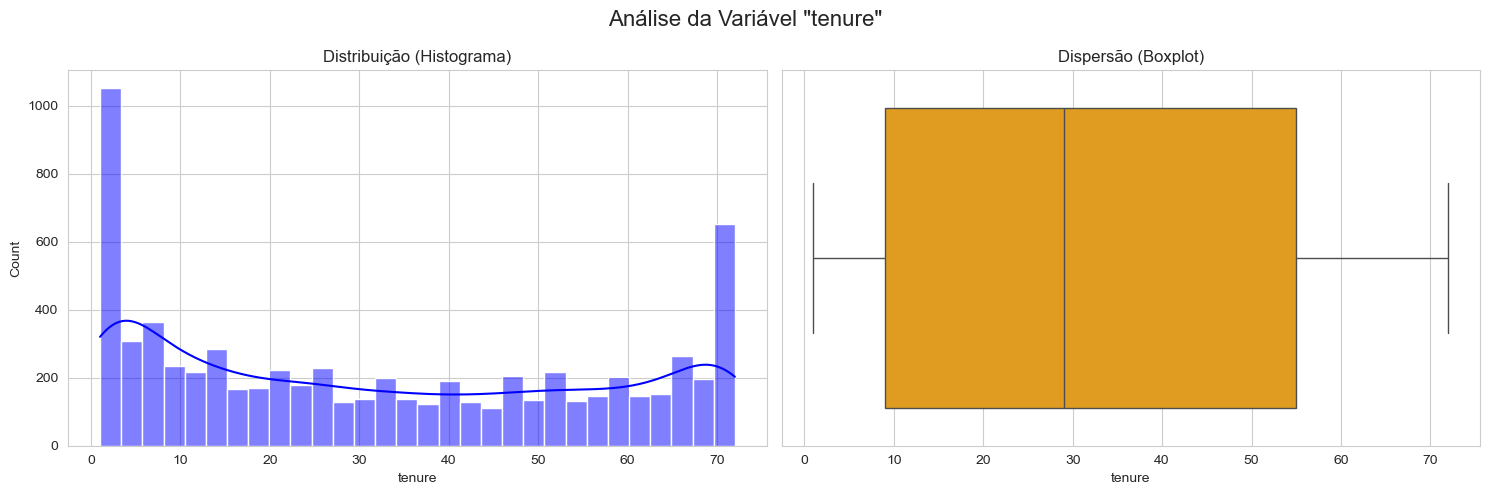


### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.



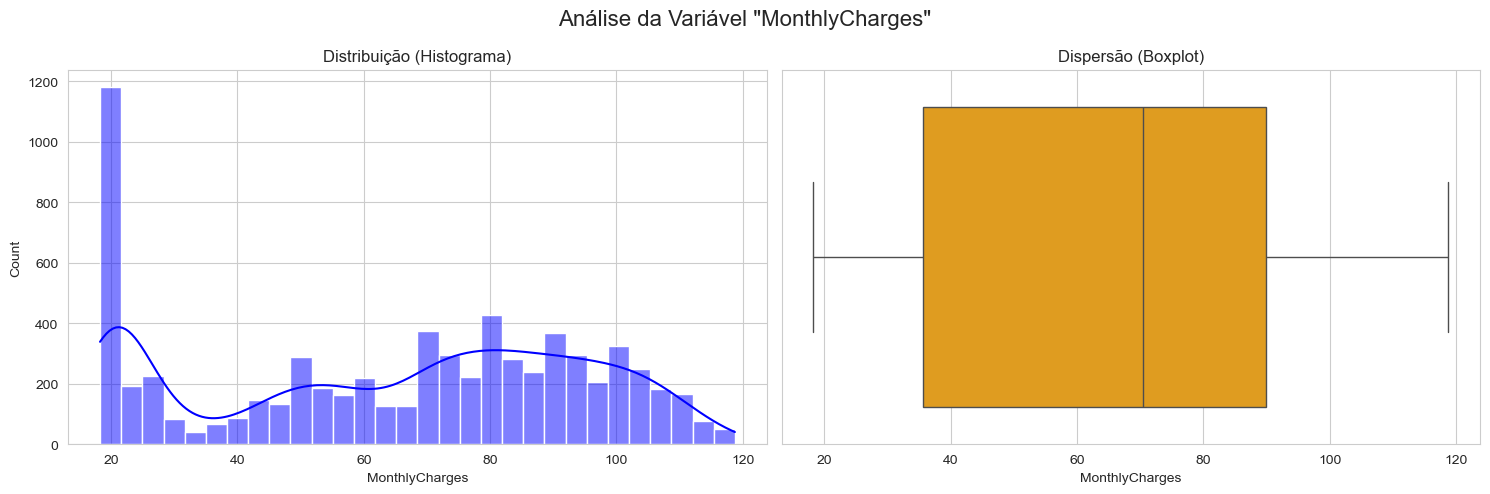


### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).



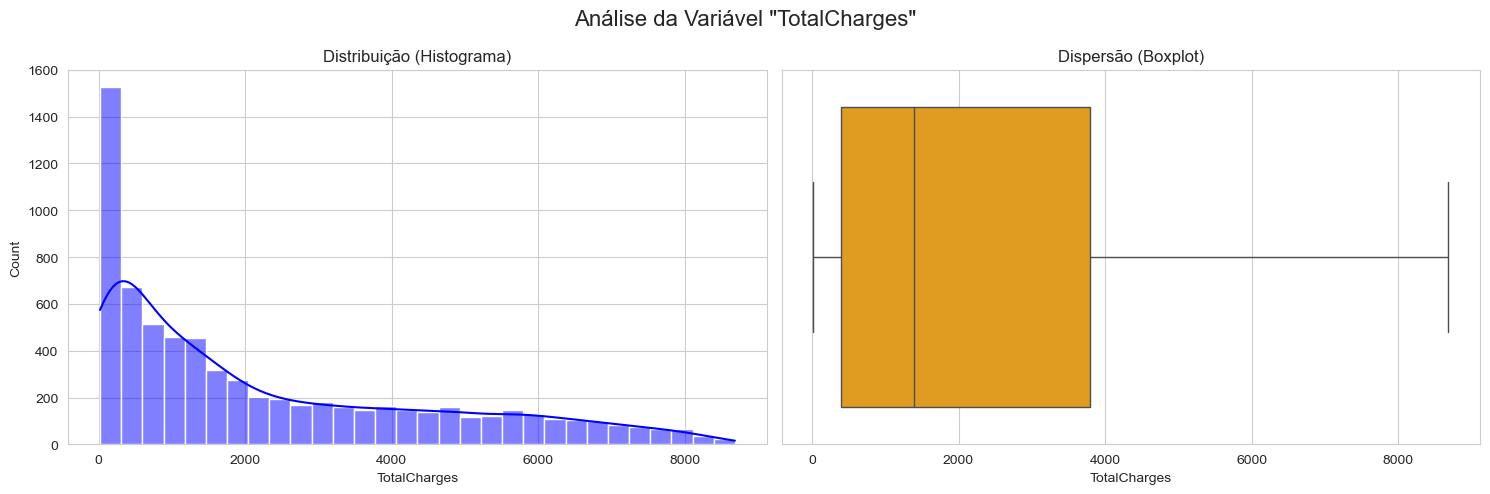


### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.



In [22]:

# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona automaticamente todas as colunas com tipos numéricos (int64 e float64)
# O .columns no final garante que estamos pegando apenas a lista de nomes das colunas para o loop
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Dicionário com insights pré-definidos para cada coluna
insights = {
    'tenure': """
### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.

""",

    'MonthlyCharges': """
### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).

""",

    'TotalCharges': """
### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.

"""
}

# Loop para gerar gráficos e exibir insights
for coluna in colunas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Análise da Variável "{coluna}"', fontsize=16)

    # Histograma (distribuição) com curva de densidade
    sns.histplot(data=dados, x=coluna, kde=True, ax=axes[0], color='blue', bins=30)
    axes[0].set_title('Distribuição (Histograma)')

    # Boxplot (dispersão, mediana, quartis, outliers)
    sns.boxplot(data=dados, x=coluna, ax=axes[1], color='orange')
    axes[1].set_title('Dispersão (Boxplot)')

    plt.tight_layout()
    plt.show()

    # Exibe o Markdown correspondente à coluna
    display(Markdown(insights[coluna]))
    print(f"\n{'='*80}")

### 3.2. Análise Univariada - Variáveis Categóricas

Agora, vamos analisar as variáveis categóricas para entender a frequência e a distribuição de suas categorias. Utilizaremos **gráficos de barras (countplots)** para visualizar a contagem de clientes em cada categoria, o que nos ajudará a identificar perfis predominantes na base de clientes.

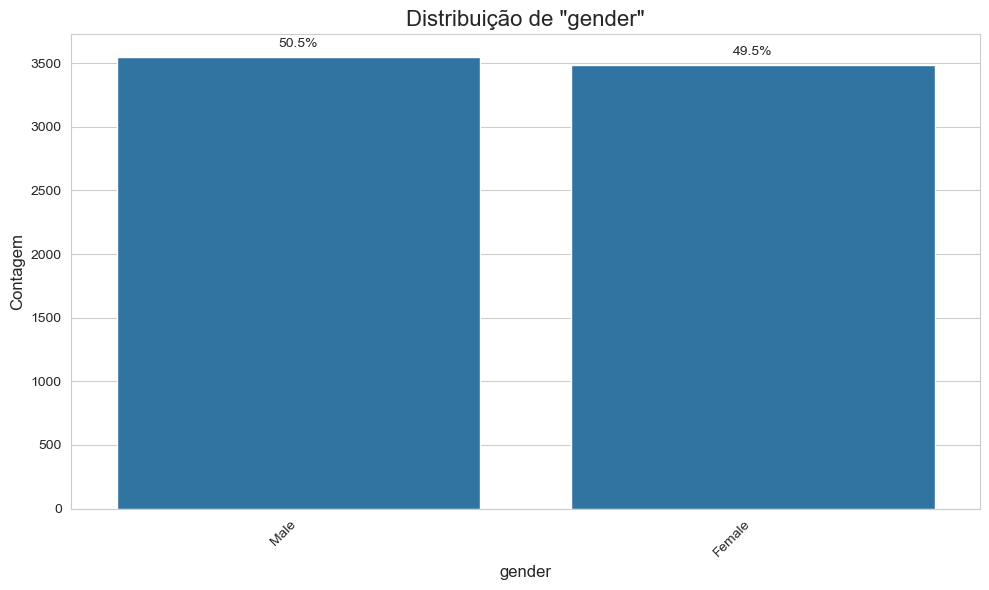


### Variável `gender` Gênero do cliente (Female, Male).
- **Distribuição**: A distribuição de gênero está equilibrada, com 50,5% de clientes do gênero masculino e 49,5% do gênero feminino.
- **Insight**: O equilíbrio sugere que o dataset não apresenta viés significativo de gênero na base de clientes, o que permite uma análise imparcial em relação a outras variáveis. Isso é positivo para evitar distorções em modelos preditivos, mas vale investigar se há diferenças sutis em padrões de churn ou preferências de serviço por gênero.
- **Próximos Passos**: Analisar a taxa de churn por 'gender' para verificar se há diferenças entre homens e mulheres. Cruzar com outras variáveis como 'tenure' ou 'InternetService' para detectar interações.


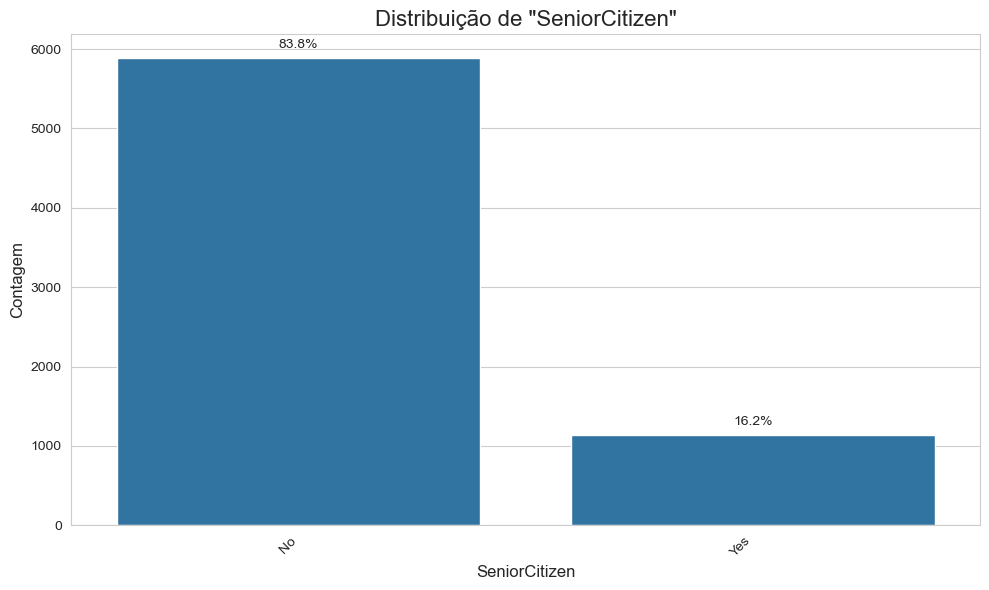


### Descobertas Univariadas para 'SeniorCitizen' (Idoso ou Não)
- **Distribuição**: A maioria dos clientes não é idosa (83,8% com SeniorCitizen=0), enquanto apenas 16,2% são idosos (SeniorCitizen=1).
- **Insight**: Há um forte desbalanceamento, sugerindo que o serviço é mais utilizado por clientes mais jovens ou de meia-idade.
- **Próximos Passos**: Analisar a taxa de churn por 'SeniorCitizen' para verificar se idosos têm comportamento diferente (ex.: maior churn por custo ou insatisfação).


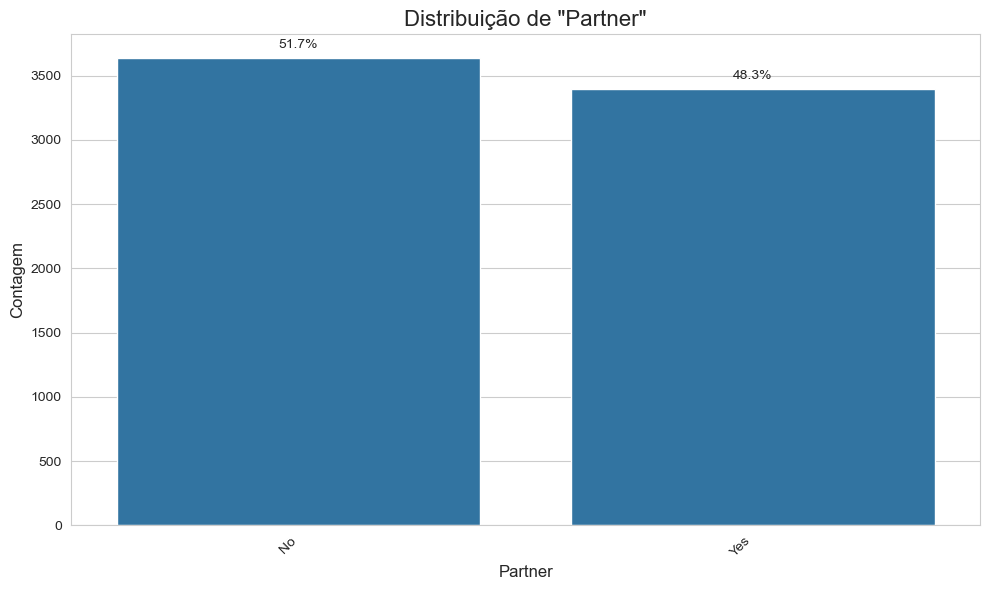


### Descobertas Univariadas para 'Partner'
- **Distribuição**: A presença de parceiro está equilibrada, com 48,3% dos clientes tendo Partner=Yes e 51,2% tendo Partner=No.
- **Insight**: O equilíbrio sugere que a variável não apresenta desbalanceamento significativo, o que permite uma análise justa de seu impacto em outras variáveis.
- **Próximos Passos**: Analisar a taxa de churn por 'Partner' para verificar se a presença de parceiro influencia a retenção.


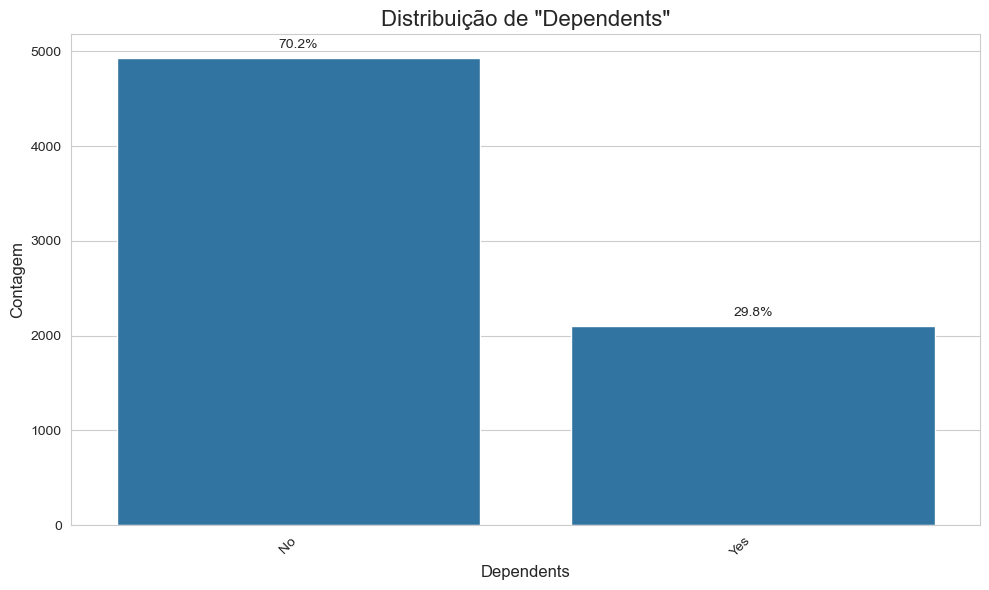


### Descobertas Univariadas para 'Dependents'
- **Distribuição**: A maioria dos clientes (70,25%) não tem dependentes, enquanto apenas ~29,75% têm dependentes.
- **Insight**: Há um desequilíbrio significativo, sugerindo que o serviço é mais utilizado por clientes sem filhos. Isso pode indicar uma oportunidade perdida de reter clientes com dependentes.
- **Próximos Passos**: Analisar a taxa de churn por 'Dependents' para verificar se clientes com dependentes churnam mais.


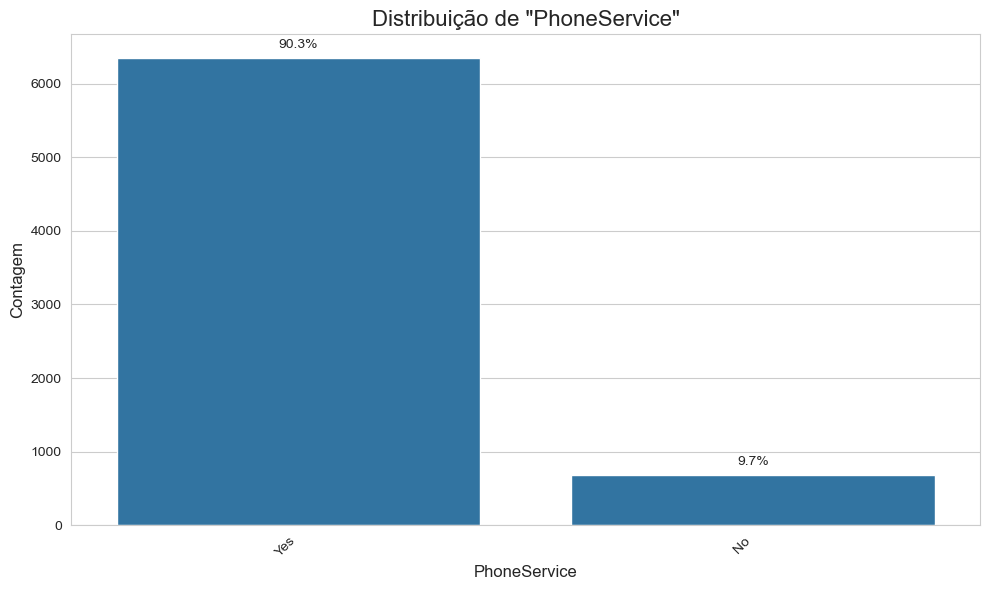

### Sem insights pré-definidos para 'PhoneService'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


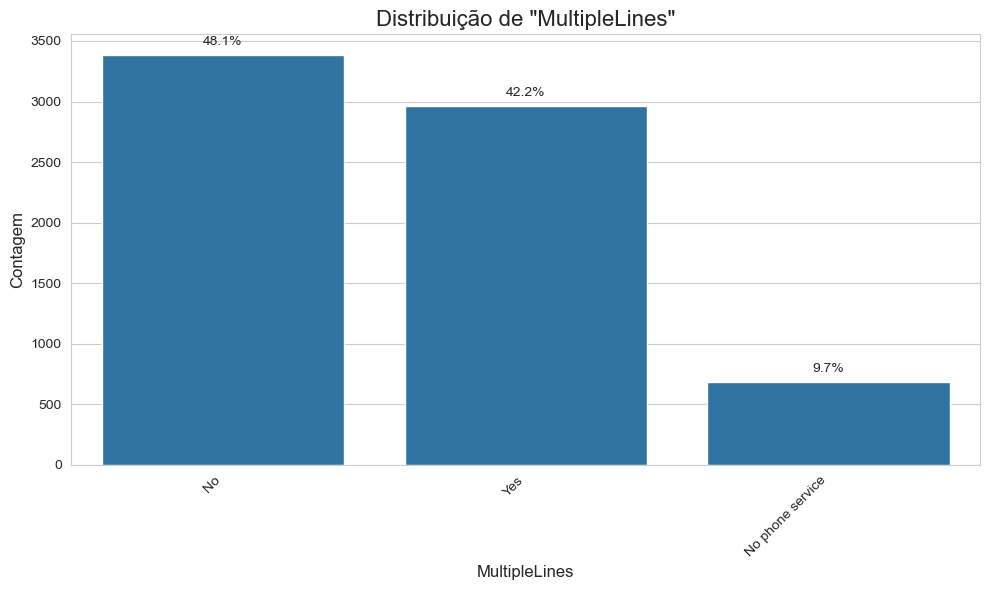

### Sem insights pré-definidos para 'MultipleLines'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


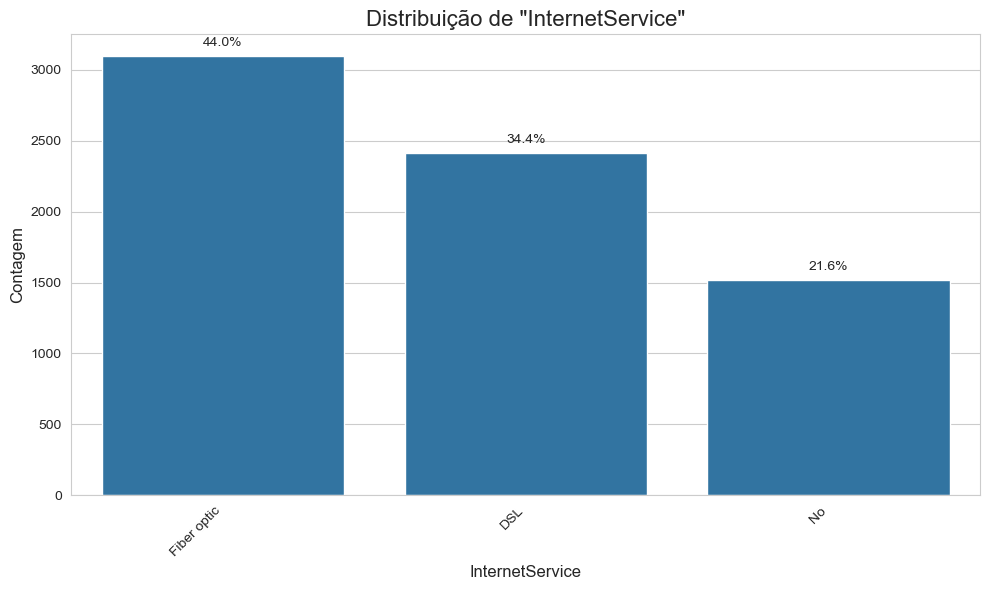


### Descobertas Univariadas para 'InternetService'
- **Distribuição**: A maioria dos clientes (44%) usa fibra óptica, 34,4% usam DSL, e 21,6% não têm internet.
- **Insight**: Há uma preferência por fibra óptica, e o número alto de clientes sem internet (21,6%) pode indicar planos básicos ou desatualizados, representando um risco ou oportunidade.
- **Próximos Passos**: Analisar a taxa de churn por 'InternetService' para verificar o impacto da ausência de internet.


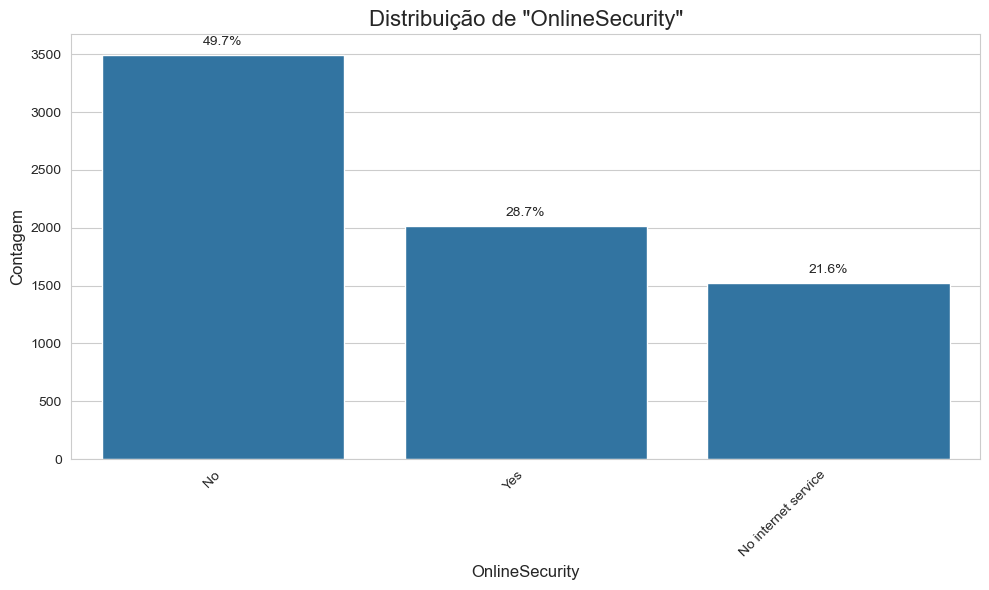

### Sem insights pré-definidos para 'OnlineSecurity'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


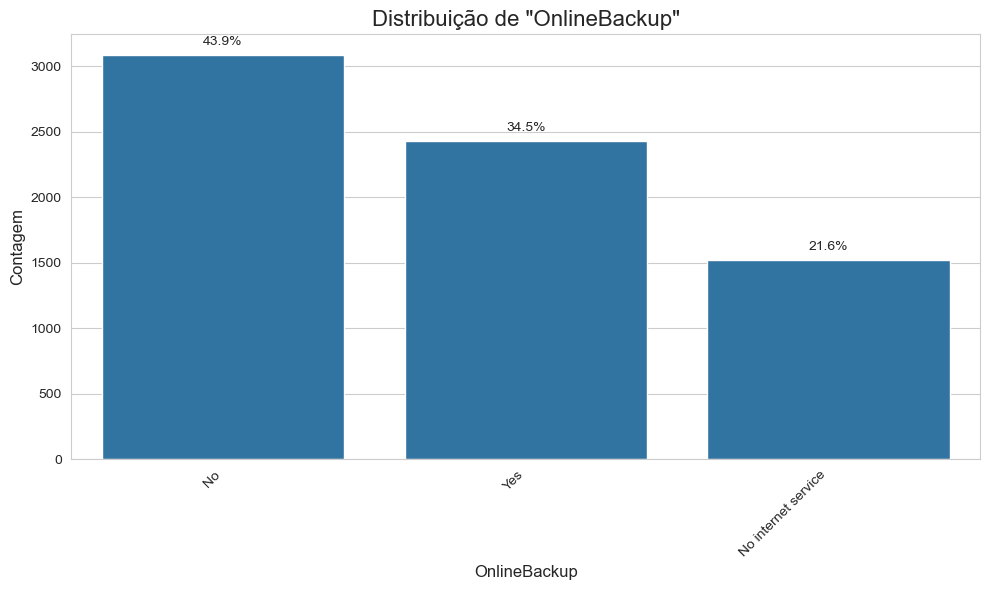

### Sem insights pré-definidos para 'OnlineBackup'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


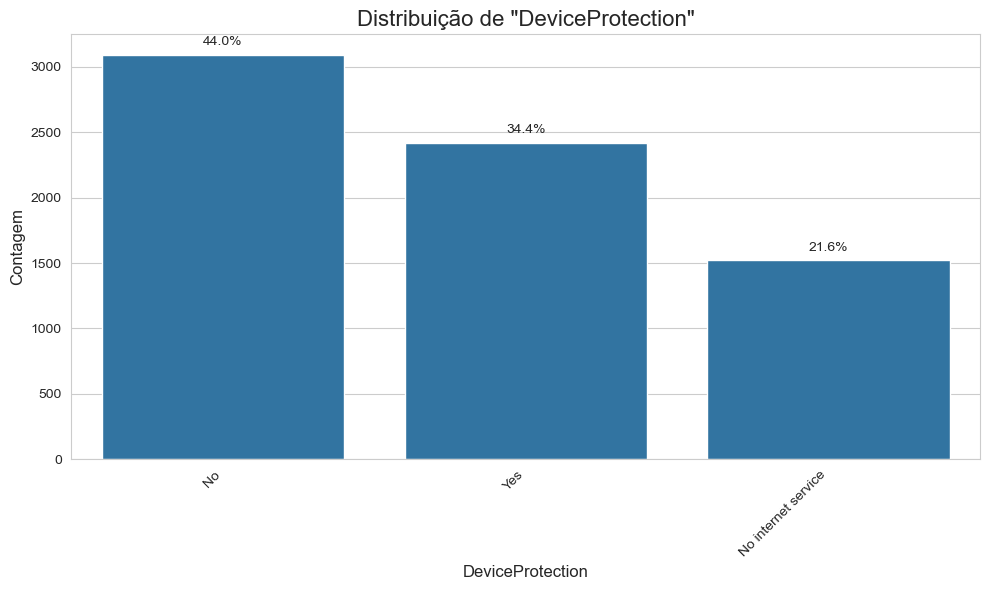

### Sem insights pré-definidos para 'DeviceProtection'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


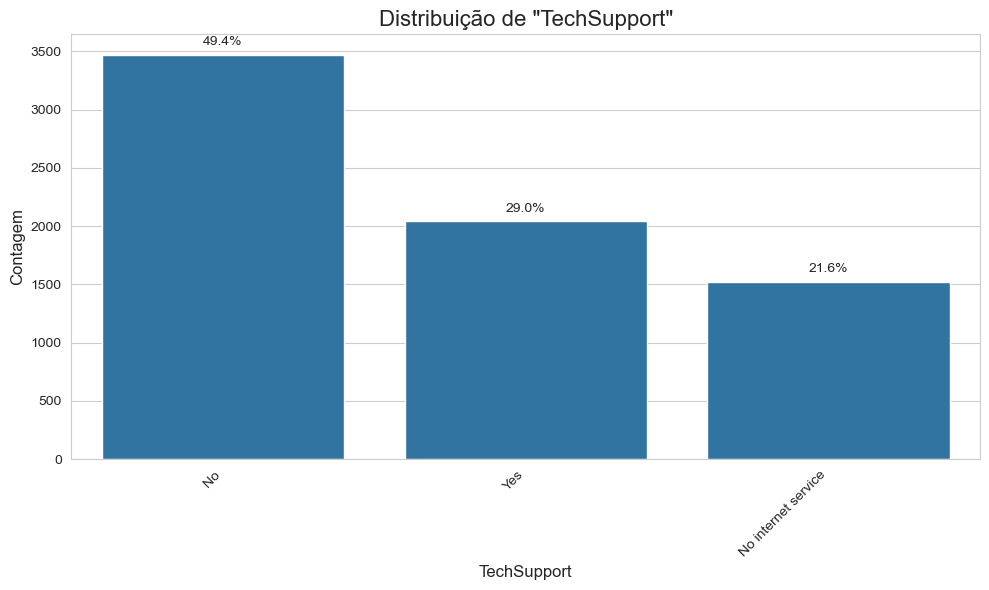


### Descobertas Univariadas para 'TechSupport'
- **Distribuição**: [Ex.: ~60% sem TechSupport, ~40% com TechSupport].
- **Insight**: [Ex.: A maioria sem suporte técnico pode indicar insatisfação potencial].
- **Próximos Passos**: Analisar a taxa de churn por 'TechSupport'.


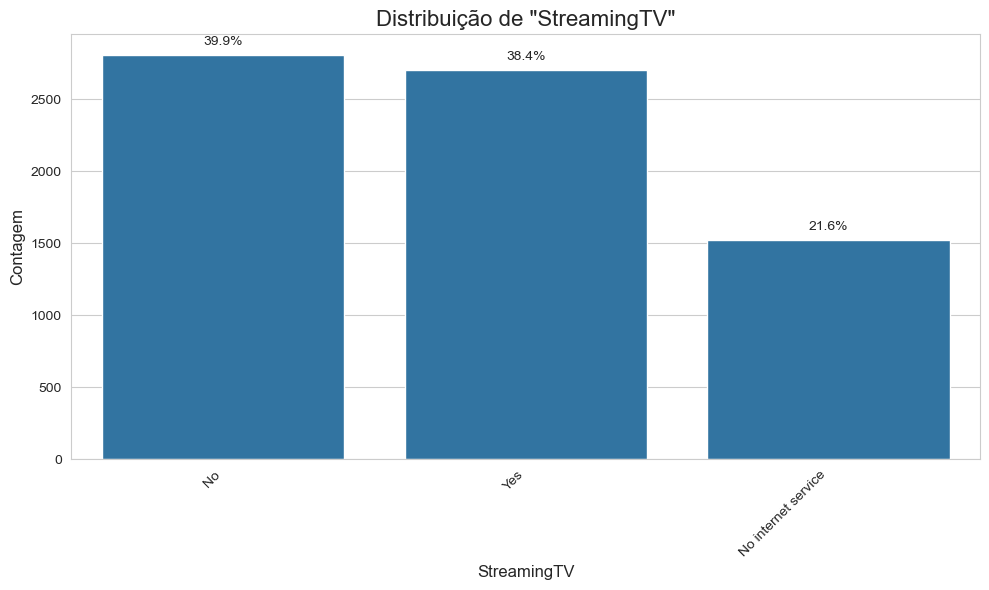

### Sem insights pré-definidos para 'StreamingTV'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


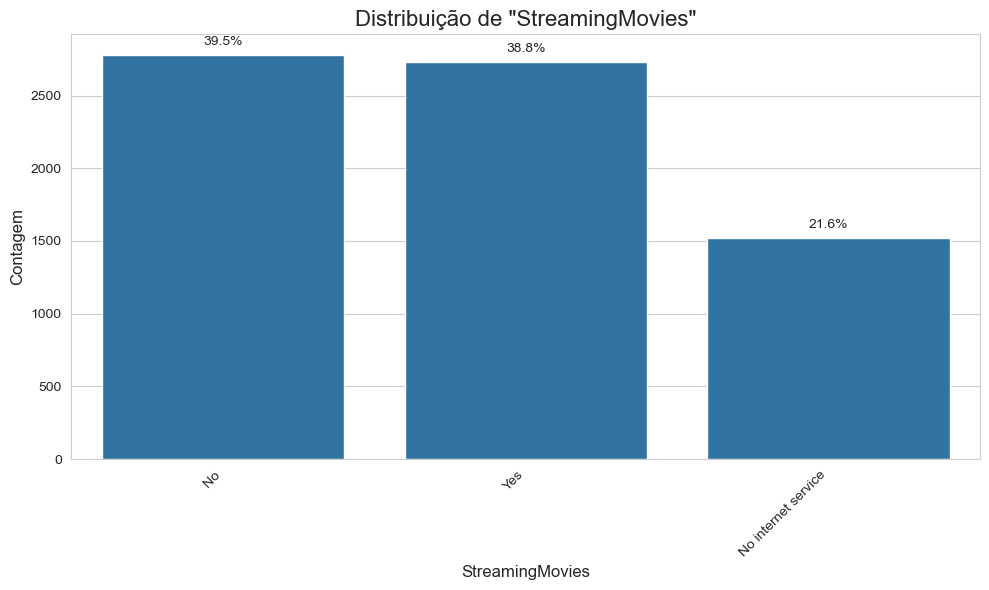

### Sem insights pré-definidos para 'StreamingMovies'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


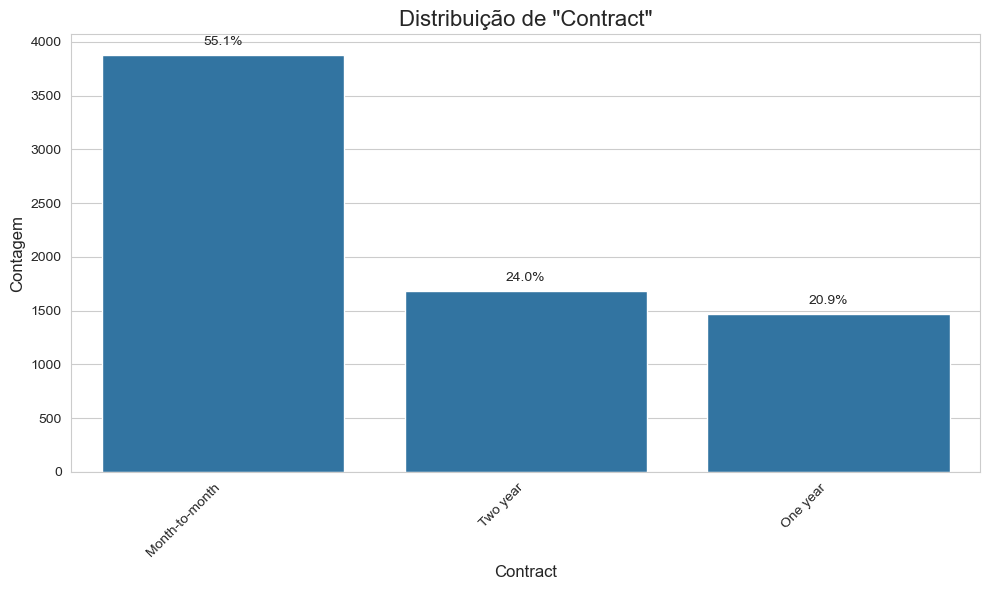


### Descobertas Univariadas para 'Contract'
- **Distribuição**: Mais da metade dos clientes (55,1%) têm contrato do tipo "Month-to-month", enquanto os outros ~44,9% estão em contratos de "One year" ou "Two year".
- **Insight**: A predominância de contratos mensais pode estar aumentando a rotatividade, devido à ausência de multa ou punição por cancelamento.
- **Próximos Passos**: Analisar a taxa de churn por 'Contract' para confirmar o impacto nos cancelamentos.


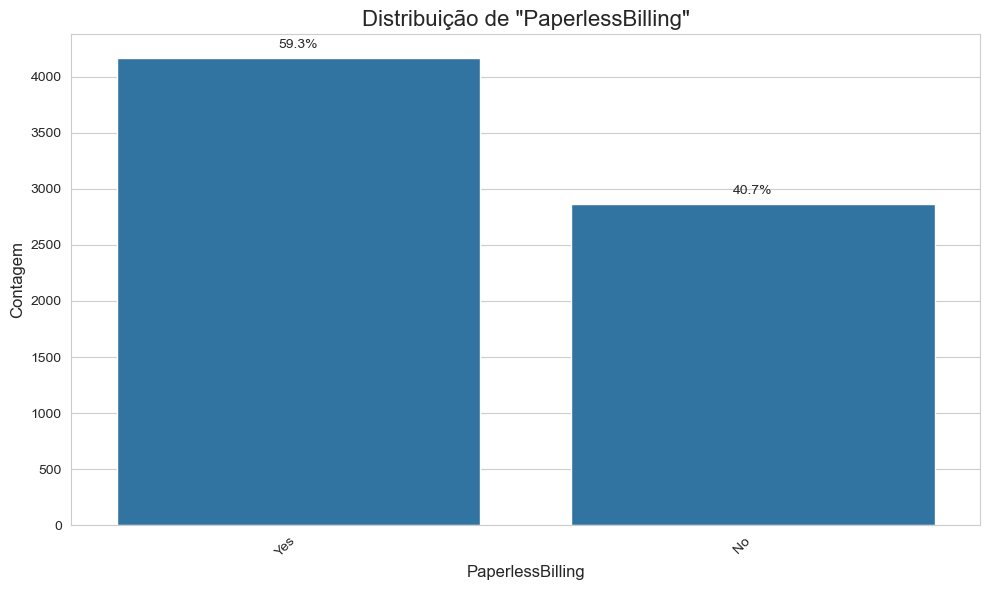

### Sem insights pré-definidos para 'PaperlessBilling'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


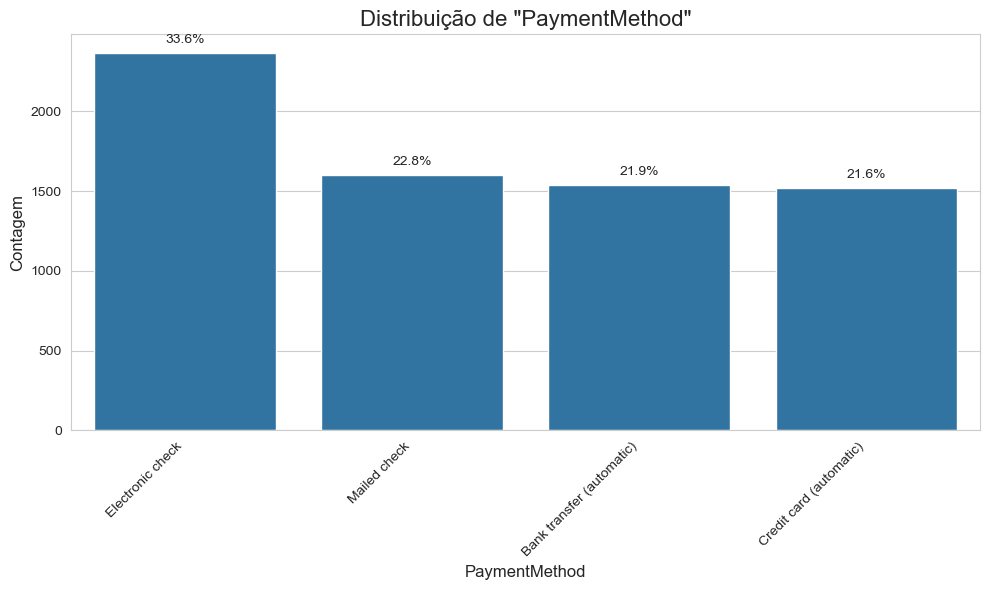


### Descobertas Univariadas para 'PaymentMethod'
- **Distribuição**: [Ex.: ~40% usam Electronic check, ~25% Mailed check, ~20% Bank transfer, ~15% Credit card].
- **Insight**: [Ex.: A predominância de Electronic check pode indicar preferência por pagamentos rápidos, mas a diversidade sugere múltiplas opções viáveis].
- **Próximos Passos**: Analisar a taxa de churn por 'PaymentMethod' para verificar se algum método está associado a maior cancelamento.


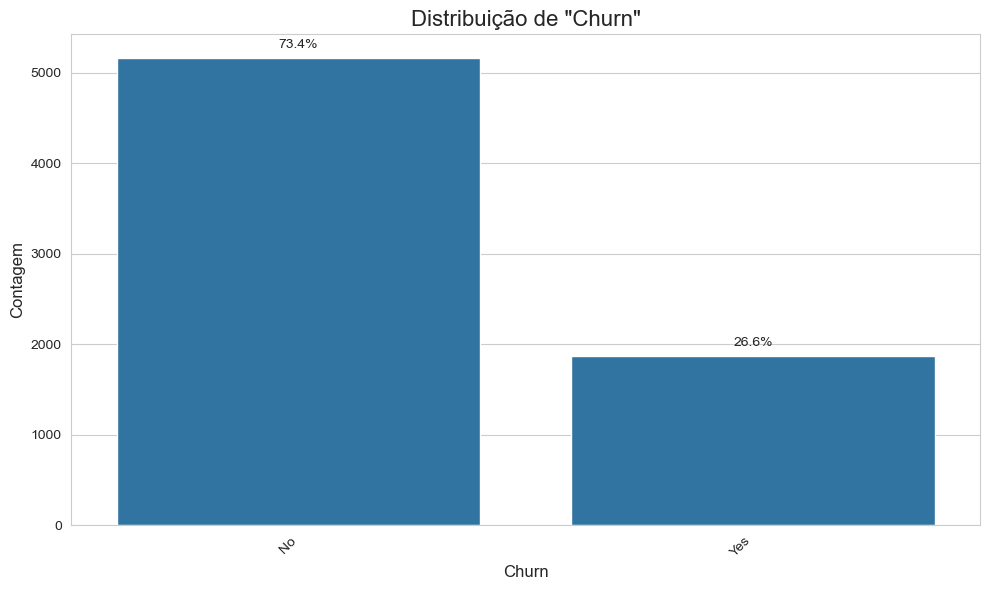

### Sem insights pré-definidos para 'Churn'
-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.


In [31]:
# --- Colunas categóricas (object/category) ---
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()

# (Opcional) Remover colunas de ID ou de alta cardinalidade que poluem os gráficos
for col_remove in ['customerID', 'id', 'ID']:
    if col_remove in colunas_categoricas:
        colunas_categoricas.remove(col_remove)

# --- Dicionário de insights (igual ao seu, só certificado de que está bem formatado) ---
insights = {
     'gender': """
### Variável `gender` Gênero do cliente (Female, Male).
- **Distribuição**: A distribuição de gênero está equilibrada, com 50,5% de clientes do gênero masculino e 49,5% do gênero feminino.
- **Insight**: O equilíbrio sugere que o dataset não apresenta viés significativo de gênero na base de clientes, o que permite uma análise imparcial em relação a outras variáveis. Isso é positivo para evitar distorções em modelos preditivos, mas vale investigar se há diferenças sutis em padrões de churn ou preferências de serviço por gênero.
- **Próximos Passos**: Analisar a taxa de churn por 'gender' para verificar se há diferenças entre homens e mulheres. Cruzar com outras variáveis como 'tenure' ou 'InternetService' para detectar interações.
""",
    'SeniorCitizen': """
### Descobertas Univariadas para 'SeniorCitizen' (Idoso ou Não)
- **Distribuição**: A maioria dos clientes não é idosa (83,8% com SeniorCitizen=0), enquanto apenas 16,2% são idosos (SeniorCitizen=1).
- **Insight**: Há um forte desbalanceamento, sugerindo que o serviço é mais utilizado por clientes mais jovens ou de meia-idade.
- **Próximos Passos**: Analisar a taxa de churn por 'SeniorCitizen' para verificar se idosos têm comportamento diferente (ex.: maior churn por custo ou insatisfação).
""",
    'Partner': """
### Descobertas Univariadas para 'Partner'
- **Distribuição**: A presença de parceiro está equilibrada, com 48,3% dos clientes tendo Partner=Yes e 51,2% tendo Partner=No.
- **Insight**: O equilíbrio sugere que a variável não apresenta desbalanceamento significativo, o que permite uma análise justa de seu impacto em outras variáveis.
- **Próximos Passos**: Analisar a taxa de churn por 'Partner' para verificar se a presença de parceiro influencia a retenção.
""",
    'Dependents': """
### Descobertas Univariadas para 'Dependents'
- **Distribuição**: A maioria dos clientes (70,25%) não tem dependentes, enquanto apenas ~29,75% têm dependentes.
- **Insight**: Há um desequilíbrio significativo, sugerindo que o serviço é mais utilizado por clientes sem filhos. Isso pode indicar uma oportunidade perdida de reter clientes com dependentes.
- **Próximos Passos**: Analisar a taxa de churn por 'Dependents' para verificar se clientes com dependentes churnam mais.
""",
    'InternetService': """
### Descobertas Univariadas para 'InternetService'
- **Distribuição**: A maioria dos clientes (44%) usa fibra óptica, 34,4% usam DSL, e 21,6% não têm internet.
- **Insight**: Há uma preferência por fibra óptica, e o número alto de clientes sem internet (21,6%) pode indicar planos básicos ou desatualizados, representando um risco ou oportunidade.
- **Próximos Passos**: Analisar a taxa de churn por 'InternetService' para verificar o impacto da ausência de internet.
""",
    'Contract': """
### Descobertas Univariadas para 'Contract'
- **Distribuição**: Mais da metade dos clientes (55,1%) têm contrato do tipo "Month-to-month", enquanto os outros ~44,9% estão em contratos de "One year" ou "Two year".
- **Insight**: A predominância de contratos mensais pode estar aumentando a rotatividade, devido à ausência de multa ou punição por cancelamento.
- **Próximos Passos**: Analisar a taxa de churn por 'Contract' para confirmar o impacto nos cancelamentos.
""",
    'PaymentMethod': """
### Descobertas Univariadas para 'PaymentMethod'
- **Distribuição**: [Ex.: ~40% usam Electronic check, ~25% Mailed check, ~20% Bank transfer, ~15% Credit card].
- **Insight**: [Ex.: A predominância de Electronic check pode indicar preferência por pagamentos rápidos, mas a diversidade sugere múltiplas opções viáveis].
- **Próximos Passos**: Analisar a taxa de churn por 'PaymentMethod' para verificar se algum método está associado a maior cancelamento.
""",
    'TechSupport': """
### Descobertas Univariadas para 'TechSupport'
- **Distribuição**: [Ex.: ~60% sem TechSupport, ~40% com TechSupport].
- **Insight**: [Ex.: A maioria sem suporte técnico pode indicar insatisfação potencial].
- **Próximos Passos**: Analisar a taxa de churn por 'TechSupport'.
"""
   
}

# --- Loop para gráficos univariados (distribuição simples) ---
for coluna in colunas_categoricas:
    plt.figure(figsize=(10, 6))

    # Ordena as categorias por frequência (inclui NaN como categoria no cálculo da ordem)
    ordem = dados[coluna].value_counts(dropna=False).index

    ax = sns.countplot(data=dados, x=coluna, order=ordem)

    # Base para porcentagem: somente valores não nulos da coluna
    total_validos = dados[coluna].notna().sum()

    # Adiciona porcentagens nas barras (em relação aos válidos)
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0 and total_validos > 0:
            porcent = (altura / total_validos) * 100
            ax.annotate(f'{porcent:.1f}%',
                        (p.get_x() + p.get_width() / 2., altura),
                        ha='center', va='bottom', fontsize=10,
                        xytext=(0, 5), textcoords='offset points')

    plt.title(f'Distribuição de "{coluna}"', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Mostra insight se existir; caso contrário, coloca um placeholder amigável
    texto_insight = insights.get(
        coluna,
        f"### Sem insights pré-definidos para '{coluna}'\n"
        f"-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.\n"
    )
    display(Markdown(texto_insight))
    print("\n" + "="*80)
